In [2]:
import pandas as pd
fp = r"C:\Users\Shubhankar\OneDrive\Desktop\bike_sharing.csv"
df = pd.read_csv(fp)
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-n

In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month

df = pd.get_dummies(df, columns=['season', 'weather'], drop_first=True)

print(df.head())


             datetime  holiday  workingday  temp   atemp  humidity  windspeed  \
0 2011-01-01 00:00:00        0           0  9.84  14.395        81        0.0   
1 2011-01-01 01:00:00        0           0  9.02  13.635        80        0.0   
2 2011-01-01 02:00:00        0           0  9.02  13.635        80        0.0   
3 2011-01-01 03:00:00        0           0  9.84  14.395        75        0.0   
4 2011-01-01 04:00:00        0           0  9.84  14.395        75        0.0   

   casual  registered  count  hour  day_of_week  month  season_2  season_3  \
0       3          13     16     0            5      1     False     False   
1       8          32     40     1            5      1     False     False   
2       5          27     32     2            5      1     False     False   
3       3          10     13     3            5      1     False     False   
4       0           1      1     4            5      1     False     False   

   season_4  weather_2  weather_3  weather_4

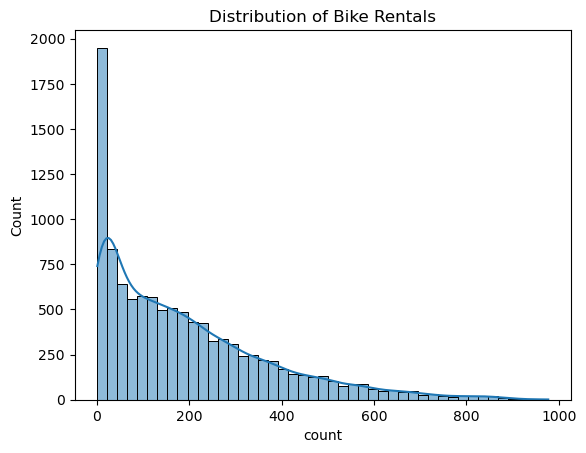

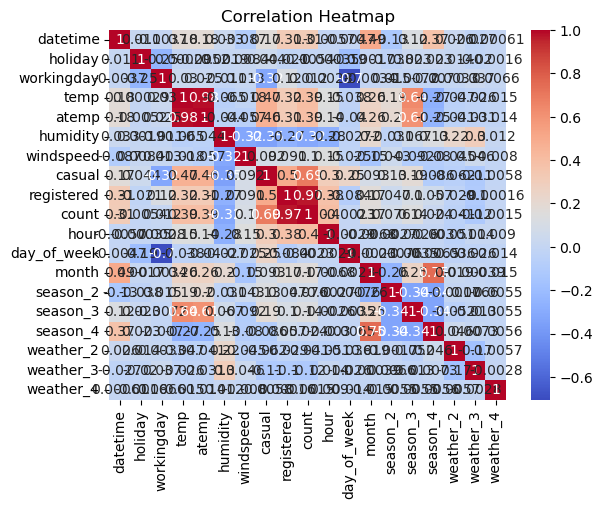

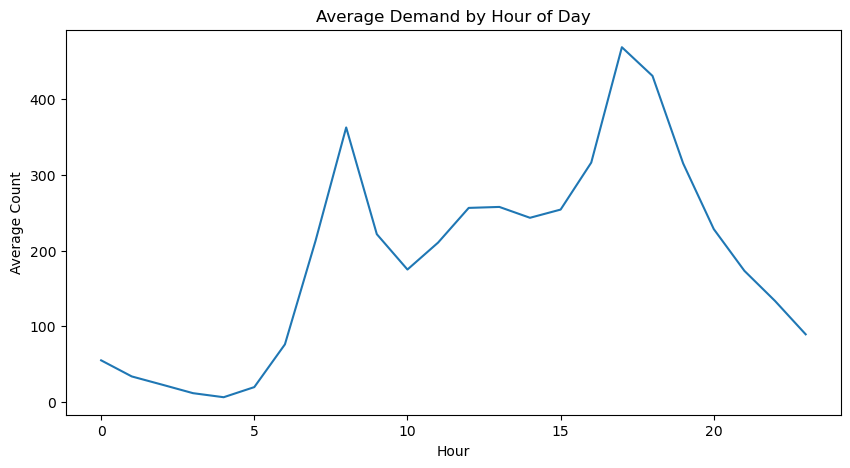

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['count'], kde=True)
plt.title('Distribution of Bike Rentals')
plt.show()

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

hourly_demand = df.groupby('hour')['count'].mean()
hourly_demand.plot(kind='line', figsize=(10, 5))
plt.title('Average Demand by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.show()


In [6]:
season_groups = [
    df[df['season_2'] == 1]['count'],  
    df[df['season_3'] == 1]['count'],  
    df[df['season_4'] == 1]['count'],  
    df[(df['season_2'] == 0) & (df['season_3'] == 0) & (df['season_4'] == 0)]['count']  

from scipy.stats import f_oneway

f_stat, p_value = f_oneway(*season_groups)
print(f"ANOVA Test Results: F-statistic = {f_stat}, p-value = {p_value}")

correlation = df['temp'].corr(df['count'])
print(f"Correlation between temperature and demand: {correlation}")

ANOVA Test Results: F-statistic = 236.94671081032104, p-value = 6.164843386499654e-149
Correlation between temperature and demand: 0.39445364496724933


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns=['datetime', 'count', 'casual', 'registered'])
y = df['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

lr_rmse = mean_squared_error(y_test, lr_preds, squared=False)
lr_r2 = r2_score(y_test, lr_preds)
print(f"Linear Regression RMSE: {lr_rmse}, R²: {lr_r2}")

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

rf_rmse = mean_squared_error(y_test, rf_preds, squared=False)
rf_r2 = r2_score(y_test, rf_preds)
print(f"Random Forest RMSE: {rf_rmse}, R²: {rf_r2}")


Linear Regression RMSE: 146.4122811178533, R²: 0.35054389326576274
Random Forest RMSE: 65.65607621006738, R²: 0.869399560112806


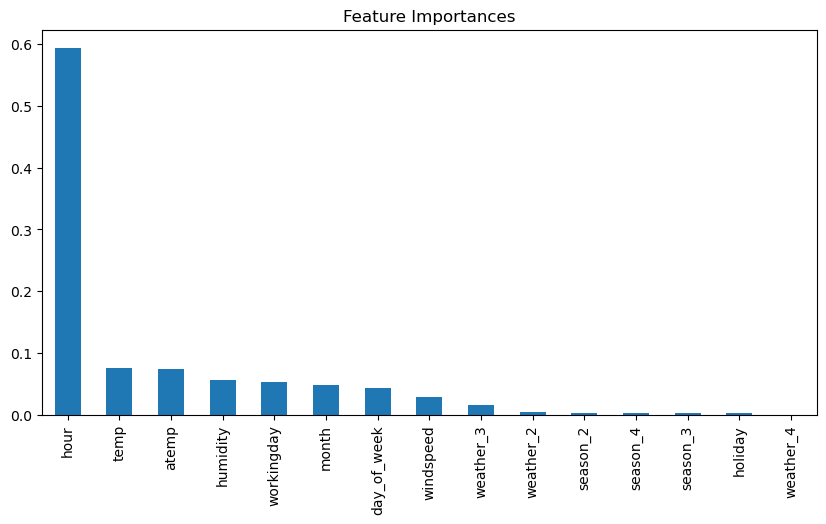

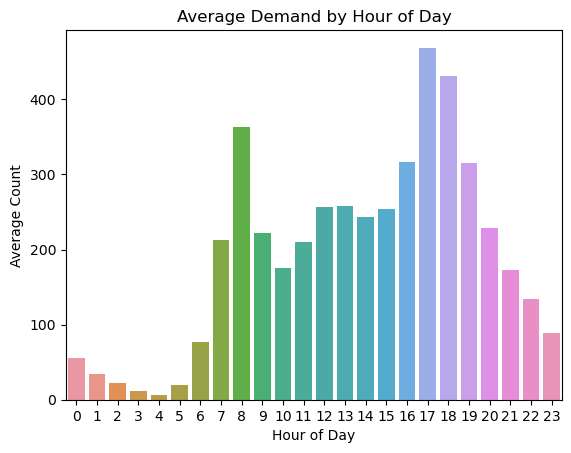

In [9]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Feature Importances')
plt.show()

sns.barplot(data=df, x='hour', y='count', errorbar=None)  
plt.title('Average Demand by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Count')
plt.show()


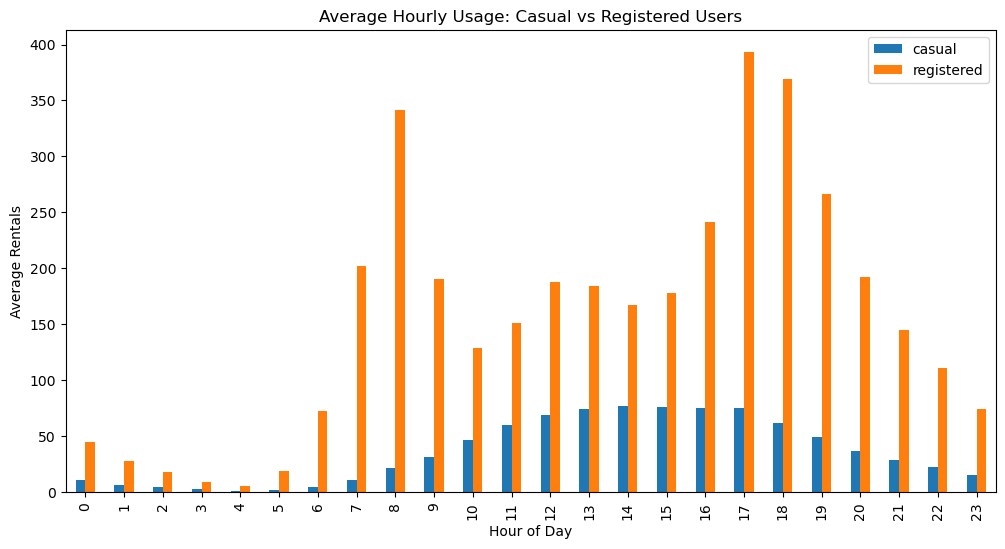

In [10]:
hourly_usage = df.groupby('hour')[['casual', 'registered']].mean()
hourly_usage.plot(kind='bar', figsize=(12, 6))
plt.title('Average Hourly Usage: Casual vs Registered Users')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.show()


Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count', 'hour', 'day_of_week', 'month',
       'season_2', 'season_3', 'season_4', 'weather_2', 'weather_3',
       'weather_4'],
      dtype='object')


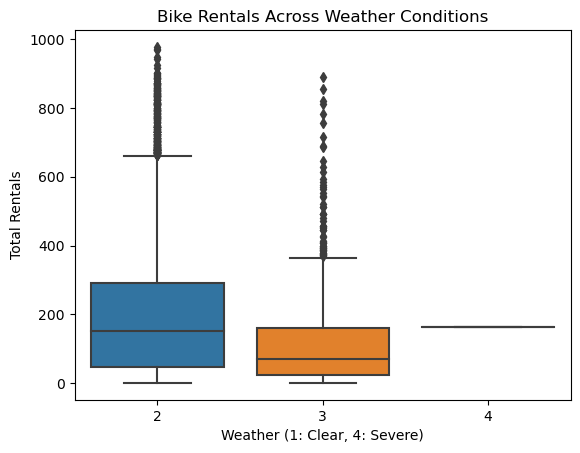

In [14]:
print(df.columns)

if 'weather_2' in df.columns:  
    df['weather'] = df[['weather_2', 'weather_3', 'weather_4']].idxmax(axis=1).str[-1].astype(int)

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='weather', y='count')
plt.title('Bike Rentals Across Weather Conditions')
plt.xlabel('Weather (1: Clear, 4: Severe)')
plt.ylabel('Total Rentals')
plt.show()

df['weather'] = df['weather'].astype('category')

df['count'] = pd.to_numeric(df['count'], errors='coerce')


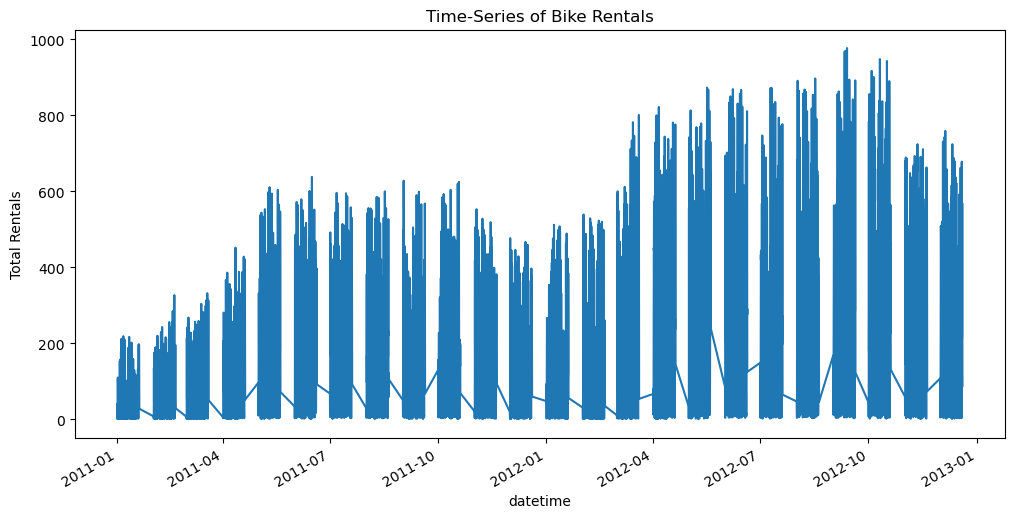

In [12]:
df.set_index('datetime', inplace=True)
df['count'].plot(figsize=(12, 6))
plt.title('Time-Series of Bike Rentals')
plt.ylabel('Total Rentals')
plt.show()


In [ ]:
Insights and Recommendations

1.Key Factors Influencing Demand:

    a.Time of Day: Rentals peak during morning and evening commute hours.
    b.Seasonality: Summer and fall see higher demand, while winter has lower rentals.
    c.Weather: Clear weather boosts rentals, while heavy rain or snow reduces them.
    d.Temperature and Humidity: Comfortable weather conditions correlate with higher rentals.

2. Actionable Recommendations:

    a.Fleet Distribution: Increase fleet availability during peak commute hours and at high-demand locations.
    b.Weather-Responsive Operations: Adjust fleet operations based on weather forecasts (e.g., reduce fleet during heavy rain).
    c.Promotions: Offer discounts or promotions during low-demand seasons (winter) to boost usage.
    d.Zone Optimization: Analyze specific zones for high rentals and redistribute bikes accordingly.

3.Model Performance:

    a.Random Forest outperformed Linear Regression in predictive accuracy.
    b.Hourly trends and weather data significantly improved model predictions.
    
...........................................................................................................  
|Action                     |Expected Outcome                                                             |
...........................................................................................................
|Optimize fleet allocation  |Higher bike utilization and operational efficiency.                          |
|Dynamic pricing            |Maximized revenue during high demand, improved utilization during low demand.|
|Subscription plans         |Recurring, predictable revenue from loyal customers.                         |
|Advertising partnerships   |Additional revenue streams from ads and promotions.                          |
|Corporate and student plans|Expanded customer base and increased rentals.                                |
|Enhance user experience    |Higher retention and customer satisfaction.                                  |
|Data-driven operations     |Reduced operational costs, increased demand fulfillment.                     |
...........................................................................................................
